In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,auc,roc_curve
from sklearn.ensemble import GradientBoostingClassifier

load data

In [2]:
df=pd.read_csv('D:/Python/exercise/breast-cancer-wisconsin.data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
1000025    698 non-null int64
5          698 non-null int64
1          698 non-null int64
1.1        698 non-null int64
1.2        698 non-null int64
2          698 non-null int64
1.3        698 non-null object
3          698 non-null int64
1.4        698 non-null int64
1.5        698 non-null int64
2.1        698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


clean data

In [3]:
df.replace('?',0,inplace=True)
df['1.3'] = df['1.3'].astype(np.int)
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

Adaboost

In [5]:
adb = AdaBoostClassifier(n_estimators=50)
adb.fit(x_train, y_train)
train_pred_adb = adb.predict(x_train)
test_pred_adb = adb.predict(x_test)

#model evaluation
print('training data score:',adb.score(x_train,y_train))
print('test data score:',adb.score(x_test,y_test))
print('Adaboost accuracy score:',accuracy_score(y_train,train_pred_adb))
print('Adaboost classification report:',classification_report(y_train, train_pred_adb))

training data score: 0.9946236559139785
test data score: 0.9571428571428572
Adaboost accuracy score: 0.9946236559139785
Adaboost classification report:               precision    recall  f1-score   support

           2       0.99      1.00      1.00       365
           4       0.99      0.99      0.99       193

    accuracy                           0.99       558
   macro avg       0.99      0.99      0.99       558
weighted avg       0.99      0.99      0.99       558



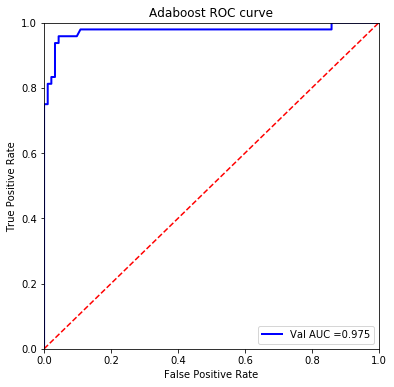

In [6]:
#AUC plot
pred = adb.predict_proba(x_test)[:,1]
tpr,fpr,threshold= roc_curve(y_test,pred,pos_label=2)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(6,6))
plt.title('Adaboost ROC curve')
plt.plot(fpr, tpr,'b',lw=2,label='Val AUC =%0.3f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GBDT

In [7]:
gbdt = GradientBoostingClassifier(n_estimators=10,max_depth=2)
gbdt.fit(x_train, y_train)
train_pred_gbdt = gbdt.predict(x_train)
test_pred_gbdt = gbdt.predict(x_test)

#model evaluation
print('training data score:',gbdt.score(x_train, y_train))
print('test data score:',gbdt.score(x_test, y_test))
print('GBDT accuracy score:',accuracy_score(y_train, train_pred_gbdt))
print('GBDT classification report:',classification_report(y_train, train_pred_gbdt))

training data score: 0.967741935483871
test data score: 0.9357142857142857
GBDT accuracy score: 0.967741935483871
GBDT classification report:               precision    recall  f1-score   support

           2       0.98      0.97      0.98       365
           4       0.95      0.96      0.95       193

    accuracy                           0.97       558
   macro avg       0.96      0.97      0.96       558
weighted avg       0.97      0.97      0.97       558



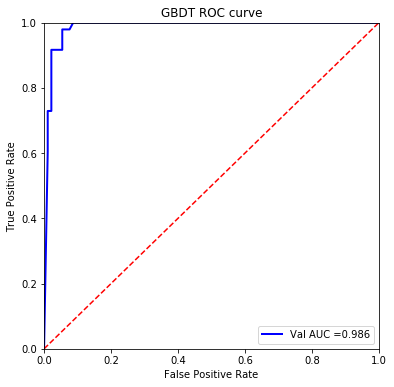

In [8]:
#AUC plot
pred = gbdt.predict_proba(x_test)[:,1]
tpr,fpr,threshold= roc_curve(y_test,pred,pos_label=2)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(6,6))
plt.title('GBDT ROC curve')
plt.plot(fpr, tpr,'b',lw=2,label='Val AUC =%0.3f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

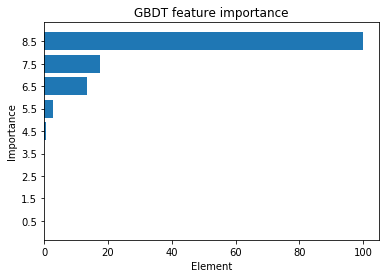

<Figure size 720x576 with 0 Axes>

In [22]:
#feature importance
gbdt_imp= gbdt.feature_importances_
gbdt_imp= 100.0*(gbdt_imp / gbdt_imp.max())
sorted_idx= np.argsort(gbdt_imp)
pos=np.arange(sorted_idx.shape[0])+.5
plt.title('GBDT feature importance')
plt.barh(pos,gbdt_imp[sorted_idx],align='center')
plt.xlabel('Element')
plt.ylabel('Importance')
plt.yticks(pos)
plt.figure(figsize=(10,8))
plt.show()